In [1]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import fiona
import community
%matplotlib inline
import matplotlib.pyplot as plt
ox.config(log_console=True, use_cache=True)
from collections import Counter

In [ ]:
city = ox.gdf_from_place('Moscow, Russia')
ox.save_gdf_shapefile(city)
city = ox.project_gdf(city)
fig, ax = ox.plot_shape(city, figsize=(3,3))

In [ ]:
place_names = ['Nizhny Novgorod, Russia',
               'Kazan, Russia',
               'Samara, Russia',
               'Ufa, Russia', 
               'Ekaterinburg, Russia']

cities = ox.gdf_from_places(place_names)
ox.save_gdf_shapefile(cities)
east_bay = ox.project_gdf(cities)
fig, ax = ox.plot_shape(cities)

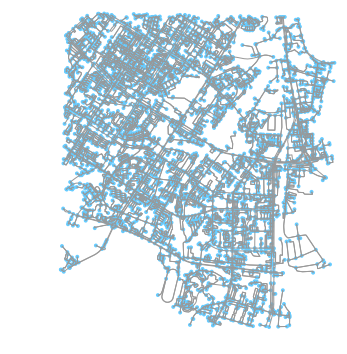

In [16]:
# define a bounding box in Moscow
#north, south, east, west = 55.8776, 55.5884, 37.8067, 37.4167

##bbox for mitino
#north, south, east, west = 55.87050, 55.81752, 37.40628, 37.32652

##bbox for izmailovo
#north, south, east, west = 55.83948, 55.77618, 37.85634, 37.74020

##bbox for khamovniki
#north, south, east, west = 55.76300, 55.70729, 37.63387, 37.54236

##bbox for kuzminki
#north, south, east, west = 55.73211, 55.67970, 37.77774, 37.71021

##bbox for kotlovka
north, south, east, west = 55.69253, 55.62938, 37.63996, 37.54570

# create network from that bounding box
G_c = ox.graph_from_bbox(north, south, east, west, network_type='drive_service')
G_c = ox.project_graph(G_c)
fig, ax = ox.plot_graph(G_c)

In [ ]:
fig.savefig('moscow_graph.png',format='png',dpi=300)

In [ ]:
# define a bounding box in Nizhny Novgorod
north, south, east, west = 56.384832, 56.207659, 44.129677, 43.765068

# create network from that bounding box
G_nn = ox.graph_from_bbox(north, south, east, west, network_type='drive')
G_nn = ox.project_graph(G_nn)
fig, ax = ox.plot_graph(G_nn)

In [ ]:
fig.savefig('nn_graph.png',format='png',dpi=400)

# save street network as ESRI shapefile to work with in GIS
ox.save_graph_shapefile(G1, filename='network-nn')

In [3]:
## estmiate base network metrics for Moscow
# get the network for Piedmont, calculate its basic stats, then show the average circuity
stats = ox.basic_stats(G_c)

In [4]:
stats

{'circuity_avg': 1.4945254089429527e-05,
 'count_intersections': 2547,
 'edge_density_km': None,
 'edge_length_avg': 76.011007471899177,
 'edge_length_total': 598206.62880384654,
 'intersection_density_km': None,
 'k_avg': 4.6775631500742945,
 'm': 7870,
 'n': 3365,
 'node_density_km': None,
 'self_loop_proportion': 0.008386277001270648,
 'street_density_km': None,
 'street_length_avg': 79.995483377203016,
 'street_length_total': 344700.53787236777,
 'street_segments_count': 4309,
 'streets_per_node_avg': 2.572659732540862,
 'streets_per_node_counts': {0: 0, 1: 818, 2: 8, 3: 2336, 4: 200, 5: 3},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.24309063893016344,
  2: 0.00237741456166419,
  3: 0.6942050520059435,
  4: 0.05943536404160475,
  5: 0.0008915304606240713}}

In [5]:
stats = ox.basic_stats(G_c)
extended_stats = ox.extended_stats(G_c, ecc=True, bc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

avg_neighbor_degree                    {3947690327: 3.0, 3172417541: 2.0, 1966669835:...
avg_neighbor_degree_avg                                                          2.65009
avg_weighted_neighbor_degree           {3947690327: 0.01280446009544559, 3172417541: ...
avg_weighted_neighbor_degree_avg                                               0.0695287
betweenness_centrality                 {3947690327: 0.012395957193816885, 3172417541:...
betweenness_centrality_avg                                                     0.0136996
center                                                                      [1846618329]
circuity_avg                                                                 1.49453e-05
closeness_centrality                   {3947690327: 0.000163334501781, 3172417541: 0....
closeness_centrality_avg                                                     0.000197583
clustering_coefficient                 {3947690327: 0.0, 3172417541: 0.0, 1966669835:...
clustering_coefficien

In [ ]:
#density-based metrics
#'Kazan','Saint-Petersburg', 'Moscow','Nizhny Novgorod','Ufa', 'Ekaterinburg', 'Chelyabinsk', 'Samara',
#'Perm, Omsk, Krasnoyarsk, Novosibirsk, Rostov-on-Don, Voronezh, Volgograd'

#Kazan        
place = 'Volgograd, Russia'
nn = ox.gdf_from_place(place)
area = ox.project_gdf(nn).unary_union.area
G_c = ox.graph_from_place(place, network_type='drive')
fig, ax = ox.plot_graph(G_c)

In [ ]:
stats = ox.basic_stats(G_c, area=area)
for k, count in stats['streets_per_node_counts'].items():
    stats['int_{}_count'.format(k)] = count
for k, proportion in stats['streets_per_node_proportion'].items():
    stats['int_{}_prop'.format(k)] = proportion

# delete the no longer needed dict elements
del stats['streets_per_node_counts']
del stats['streets_per_node_proportion']

# load as a pandas dataframe
graph_stat = pd.DataFrame(pd.Series(stats)).T

In [ ]:
#graphstat = pd.DataFrame(pd.Series(stats))
#graphstat = pd.DataFrame()

In [ ]:
graphstat = graphstat.append(pd.DataFrame(data = graph_stat), ignore_index=True)
graphstat

In [ ]:
graphstat.to_csv('graphstat_by_cities.csv')

In [ ]:
# how many streets emanate from each intersection?
G_c.graph['streets_per_node']

In [ ]:
list(G.nodes(data=True))[0:2]

In [ ]:
list(G.edges(keys=True, data=True))[0:2]

In [ ]:
nc = ['r' if G.graph['streets_per_node'][node]==1 else 'none' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=2, fig_height=4)

In [9]:
bb = ox.stats.extended_stats(G_c, connectivity=True, ecc=False, bc=True, cc=True)

In [10]:
nx.set_node_attributes(G_c, 'closeness_centrality',  bb['closeness_centrality'])
nx.set_node_attributes(G_c, 'betweenness_centrality',  bb['betweenness_centrality'])
nx.set_node_attributes(G_c, 'degree_centrality',  bb['degree_centrality'])

ox.save_graph_shapefile(G_c, filename='network-khamovniki')

In [17]:
ox.save_graph_shapefile(G_c, filename='network-kotly')

In [ ]:
partition = community.best_partition(G_c,resolution=100)